In [2]:
#for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('/Users/rmtaylor/Desktop/School/Titanic ML Challenge/train.csv')
test_df = pd.read_csv('/Users/rmtaylor/Desktop/School/Titanic ML Challenge/test.csv')
combine_df = [train_df, test_df]

In [4]:
# Correlation between survival and Pclass
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- We see a strong correlation between survival and class

In [5]:
# Correlation between survival and Sex
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- Females were MUCH more likely to survive, compared with men

In [6]:
# Correlation between survival and SibSp
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


- The more Siblings/Spouses the person had on the ship = the less likely they were to survive

In [7]:
# correlation between survival and Parch
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- It appears that families of 3 and individuals traveling by themselves had the highest likelihood of survival

### UPDATE: Let's look at the Cabin Feature

#### Going through this problem a 2nd time, I think I'd like to look more at the Cabin feature to
#### see if there is a way to incorporate it.  My thoughts are that people on certain decks and in certain parts
#### of the ship (bow, stern, etc.) might have had different probabilities of survival. 

##### So, Let's first look at the values of the Cabin feature...

In [8]:
temp = train_df.Cabin.unique().tolist()

In [9]:
print (temp)

[nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B

We can see that:
- there are Cabin values ranging from A-G
- there are a lot of "not a number" (nan) values
- there are several strange values which include (D, T, 1)

# E. Now, let's wrangle the data!
- We've seen some clear correlations between Pclass, Sex, and SibSp

In [10]:
print("Before", train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine_df = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 11), (418, 10), (891, 11), (418, 10))

In [11]:
print("Before", train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape)

train_df = train_df.drop(['PassengerId'], axis=1)
combine_df = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape


Before (891, 11) (418, 10) (891, 11) (418, 10)


('After', (891, 10), (418, 10), (891, 10), (418, 10))

### Here is where I'm adding in the "Title" feature by extracting from the "Name" feature and then deleting the "Name" column.

In [12]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rare": 6}

for dataset in combine_df:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine_df = [train_df, test_df]

In [13]:
# Correlation between survival and Cabin
train_df[["Title", "Survived"]].groupby(["Title"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Title,Survived
2,3,0.793651
1,2,0.702703
3,4,0.575000
4,5,0.428571
5,6,0.312500
0,1,0.156673


In [14]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,3
2,1,3,female,26.0,0,0,7.9250,NaN,S,2
3,1,1,female,35.0,1,0,53.1000,C123,S,3
4,0,3,male,35.0,0,0,8.0500,NaN,S,1


In [15]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
886,0,2,male,27.0,0,0,13.00,NaN,S,6
887,1,1,female,19.0,0,0,30.00,B42,S,2
888,0,3,female,NaN,1,2,23.45,NaN,S,2
889,1,1,male,26.0,0,0,30.00,C148,C,1
890,0,3,male,32.0,0,0,7.75,NaN,Q,1


- We can now see that we have condensed down our data 
- by looking at the head of the df we can see how our data/table looks now
- by looking at the tail, we can see that we still have the correct number of passengers

In [16]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in combine_df:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)
combine_df = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,male,22.0,1,0,7.2500,S,1,8
1,1,1,female,38.0,1,0,71.2833,C,3,3
2,1,3,female,26.0,0,0,7.9250,S,2,8
3,1,1,female,35.0,1,0,53.1000,S,3,3
4,0,3,male,35.0,0,0,8.0500,S,1,8


##### Let's look at the correlation between Deck and Survived now, since we didn't have a way to before...

In [17]:
# Correlation between survival and Cabin
train_df[["Deck", "Survived"]].groupby(["Deck"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Deck,Survived
4,4,0.757576
5,5,0.750000
2,2,0.744681
6,6,0.615385
3,3,0.593220
7,7,0.500000
1,1,0.466667
8,8,0.299854
0,0,0.000000


### 2. Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. 

Let us start by converting Sex feature to a new feature called Gender where **female=1 and male=0**.

In [18]:
for dataset in combine_df:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,0,22.0,1,0,7.2500,S,1,8
1,1,1,1,38.0,1,0,71.2833,C,3,3
2,1,3,1,26.0,0,0,7.9250,S,2,8
3,1,1,1,35.0,1,0,53.1000,S,3,3
4,0,3,0,35.0,0,0,8.0500,S,1,8


### 3. Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. 
We will first do this for the **Age** feature.

We will use the following method to complete a numerical continuous feature:

Method: More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

##### Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.


In [19]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

##### Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [20]:
for dataset in combine_df:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,0,22,1,0,7.2500,S,1,8
1,1,1,1,38,1,0,71.2833,C,3,3
2,1,3,1,26,0,0,7.9250,S,2,8
3,1,1,1,35,1,0,53.1000,S,3,3
4,0,3,0,35,0,0,8.0500,S,1,8


##### Let us create Age bands and determine correlations with Survived.

In [21]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 10)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 8.0]",0.666667
1,"(8.0, 16.0]",0.413043
2,"(16.0, 24.0]",0.400000
3,"(24.0, 32.0]",0.287273
4,"(32.0, 40.0]",0.439189
5,"(40.0, 48.0]",0.352941
6,"(48.0, 56.0]",0.466667
7,"(56.0, 64.0]",0.375000
8,"(64.0, 72.0]",0.000000
9,"(72.0, 80.0]",0.500000


##### Let us replace Age with ordinals based on these bands.

In [22]:
for dataset in combine_df:    
    dataset.loc[ dataset['Age'] <= 8, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 16), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 24), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 32), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 40), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 48), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 56), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 64), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 72), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 72) & (dataset['Age'] <= 80), 'Age'] = 9
    dataset.loc[ dataset['Age'] > 80, 'Age']
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,AgeBand
0,0,3,0,2,1,0,7.2500,S,1,8,"(16.0, 24.0]"
1,1,1,1,4,1,0,71.2833,C,3,3,"(32.0, 40.0]"
2,1,3,1,3,0,0,7.9250,S,2,8,"(24.0, 32.0]"
3,1,1,1,4,1,0,53.1000,S,3,3,"(32.0, 40.0]"
4,0,3,0,4,0,0,8.0500,S,1,8,"(32.0, 40.0]"
5,0,3,0,3,0,0,8.4583,Q,1,8,"(24.0, 32.0]"
6,0,1,0,6,0,0,51.8625,S,1,5,"(48.0, 56.0]"
7,0,3,0,0,3,1,21.0750,S,4,8,"(-0.08, 8.0]"
8,1,3,1,3,0,2,11.1333,S,3,8,"(24.0, 32.0]"
9,1,2,1,1,1,0,30.0708,C,3,8,"(8.0, 16.0]"


##### We can now remove the AgeBand category

In [23]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine_df = [train_df, test_df]

In [24]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,0,2,1,0,7.2500,S,1,8
1,1,1,1,4,1,0,71.2833,C,3,3
2,1,3,1,3,0,0,7.9250,S,2,8
3,1,1,1,4,1,0,53.1000,S,3,3
4,0,3,0,4,0,0,8.0500,S,1,8


### 4. Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

**Note:** the "+1" in the code below is to account for the passenger (i.e. SibSp + Parch + individual)

In [25]:
for dataset in combine_df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone

In [26]:
for dataset in combine_df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.


In [27]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine_df = [train_df, test_df]

In [28]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Deck,IsAlone
0,0,3,0,2,7.2500,S,1,8,0
1,1,1,1,4,71.2833,C,3,3,0
2,1,3,1,3,7.9250,S,2,8,1
3,1,1,1,4,53.1000,S,3,3,0
4,0,3,0,4,8.0500,S,1,8,1


We can also create an artificial feature by combining age and Pclass

In [29]:
for dataset in combine_df:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(5)

,Age*Class,Age,Pclass
0,6,2,3
1,4,4,1
2,9,3,3
3,4,4,1
4,12,4,3


### 5. Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [30]:
common_port = train_df.Embarked.dropna().mode()[0]
common_port

'S'

In [31]:
for dataset in combine_df:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_port)

#### Now that we have filled in the missing data into "Embarked", we can now change the categorical values to numeric values as we did for "Sex" in part E.2 above

In [32]:
for dataset in combine_df:
    dataset['Embarked'] = dataset['Embarked'].map( {'C': 1, 'Q': 2, 'S': 3} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Deck,IsAlone,Age*Class
0,0,3,0,2,7.2500,3,1,8,0,6
1,1,1,1,4,71.2833,1,3,3,0,4
2,1,3,1,3,7.9250,3,2,8,1,9
3,1,1,1,4,53.1000,3,3,3,0,4
4,0,3,0,4,8.0500,3,1,8,1,12


### 6. Quick completing and converting a numeric feature

We can now complete the Fare feature for a single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

We want to meet the requirement of a model algorithm to operate on non-null values.

We will:
1. Fill in the null value
2. Creat a "FareBand" like we did for "Age" above.
3. We may also want round off the fare to two decimals as it represents currency.

**Note** "cut" is for continuous numbers and "qcut" is for non-continuous

In [33]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Deck,IsAlone,Age*Class
0,892,3,0,4,7.8292,2,1,8,1,12
1,893,3,1,5,7.0000,3,3,8,0,15
2,894,2,0,7,9.6875,2,1,8,1,14
3,895,3,0,3,8.6625,3,1,8,1,9
4,896,3,1,2,12.2875,3,3,8,0,6


2a. Creat a "FareBand"

In [34]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


2b. Convert Fare feature to ordinal values using FareBand, and then drop the FareBand column

In [35]:
for dataset in combine_df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine_df = [train_df, test_df]
    
train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Deck,IsAlone,Age*Class
0,0,3,0,2,0,3,1,8,0,6
1,1,1,1,4,3,1,3,3,0,4
2,1,3,1,3,1,3,2,8,1,9
3,1,1,1,4,3,3,3,3,0,4
4,0,3,0,4,1,3,1,8,1,12


In [36]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Deck,IsAlone,Age*Class
0,892,3,0,4,0,2,1,8,1,12
1,893,3,1,5,0,3,3,8,0,15
2,894,2,0,7,1,2,1,8,1,14
3,895,3,0,3,1,3,1,8,1,9
4,896,3,1,2,1,3,3,8,0,6


# F. Model, Predict, and Solve! 
Now we are ready to train a model and predict the required solution. 

There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. 

Our problem is a classification and regression problem. 
We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...).
We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. 

With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [37]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

### 7. Random Forests

The next model Random Forests is one of the most popular.
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, 
that operate by constructing a multitude of decision trees (n_estimators=100) at training time 
and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

91.47

# Hyper Parameter Tuning

In [39]:
# Random Forest Classifier Parameters tunning 
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(X_train, Y_train)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


0.8249158249158249


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   14.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Apply the estimator from the tuning above...

Important features
____________________________________________________________
91.47


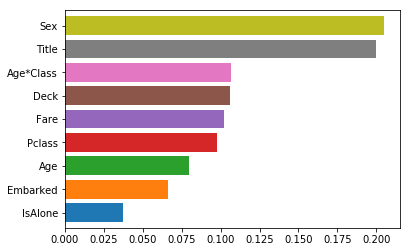

In [43]:
# Random Forests
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

# H. Reporting the results

If I wanted to submit this as my challenge submission, I would now do this...

In [44]:
submission5 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rf
    })

submission5.to_csv('/Users/rmtaylor/Titanic/submission5.csv', index=False)

# H. Reporting the results

If I wanted to submit this as my challenge submission, I would now do this...